In [1]:
import numpy as np, plottools as pl, local, tools_cmb, quad_func, binning as bn, analysis as ana
from matplotlib.pyplot import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
def plot_spec(qobj,rlz=None,cn=2,bnum=10,lmin=40,lmax=2048):
    mb = bn.multipole_binning(bnum,lmin=lmin,lmax=lmax)
    Skk, Okk = local.load_spec(qobj,mb,rlz=rlz,cn=cn)
    Mkk = np.mean(Skk,axis=0)
    Vkk = np.std(Skk,axis=0)
    st0 = ana.PTEs(Okk,Skk,x1pte=True)
    st1 = ana.PTEs(Okk,Skk,x1pte=True,diag=True)
    # plot binned spectrum lin-scale
    pl.plot_1dstyle(fsize=[10,4],xmin=mb.lmin,xmax=lmax,ylab=r'$10^2L^{0.5}C_L^{\varpi\varpi}$')
    #errorbar(mb.bc-5,(Okk-Mkk),yerr=Vkk,fmt='o')
    errorbar(mb.bc-5,mb.bc**0.5*(Okk-Mkk)*1e6,yerr=mb.bc**0.5*Vkk*1e6,fmt='o')
    #errorbar(mb.bc+5,mb.bc**0.5*Mkk*1e6,yerr=mb.bc**0.5*Vkk*1e6,fmt='o')
    #plot(aobj.l,aobj.ckk,color='k',ls='--')
    plot(aobj.l,aobj.l**0.5*aobj.ckk*1e6,color='k',ls='--')
    figtext(.7,.80,r'$\chi$-PTE:'+str(np.round(st0.px1,2)))
    figtext(.7,.75,r'$\chi^2$-PTE:'+str(np.round(st0.px2,2)))
    figtext(.7,.70,r'$\chi^2$-PTE (diag):'+str(np.round(st1.px2,2)))
    axhline(0,color='k')
    show()

In [3]:
dirs = local.data_directory()
qobj = {}
qids = ['comb_dn','comb_d','comb_n']
#qids = ['comb_dn']
for qid in qids:
    aobj = local.init_analysis_params(qid=qid,ascale=3.,wtype='iso15V3PT')
    qobj[qid] = quad_func.reconstruction(dirs['local'],aobj.ids,stag=aobj.stag,rlmin=500,qlist=['TT'])

In [4]:
#w16 = tools_cmb.get_wfactors(qids,3.,wtype='com16v3pt')

chi: 0.1 , chi (sim mean): 0.0 , chi (sim std): 5.6 , PTE: 0.84 
chi^2: 10.4 , chi^2 (sim): 11.3 , PTE: 0.41 
chi: 0.1 , chi (sim mean): 0.0 , chi (sim std): 5.6 , PTE: 0.84 
chi^2: 5.9 , chi^2 (sim): 11.3 , PTE: 0.84 


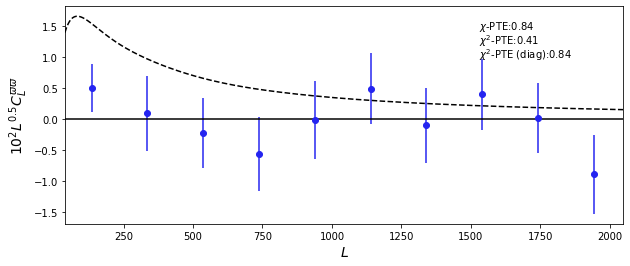

In [9]:
plot_spec(qobj['comb_dn'],bnum=10,lmin=40)

chi: 0.3 , chi (sim mean): -0.0 , chi (sim std): 5.6 , PTE: 0.94 
chi^2: 8.7 , chi^2 (sim): 11.2 , PTE: 0.65 
chi: 0.3 , chi (sim mean): -0.0 , chi (sim std): 5.6 , PTE: 0.94 
chi^2: 7.6 , chi^2 (sim): 11.2 , PTE: 0.74 


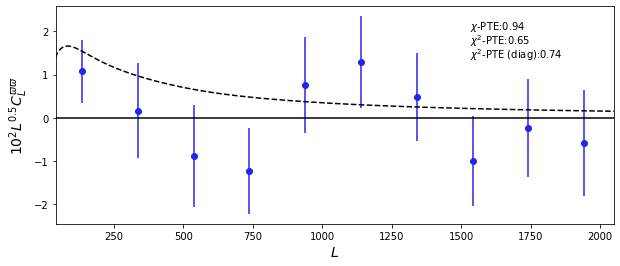

In [10]:
plot_spec(qobj['comb_d'],bnum=10,lmin=40)

chi: 4.1 , chi (sim mean): 0.0 , chi (sim std): 5.7 , PTE: 0.42 
chi^2: 7.2 , chi^2 (sim): 11.2 , PTE: 0.73 
chi: 4.1 , chi (sim mean): 0.0 , chi (sim std): 5.7 , PTE: 0.42 
chi^2: 5.7 , chi^2 (sim): 11.2 , PTE: 0.82 


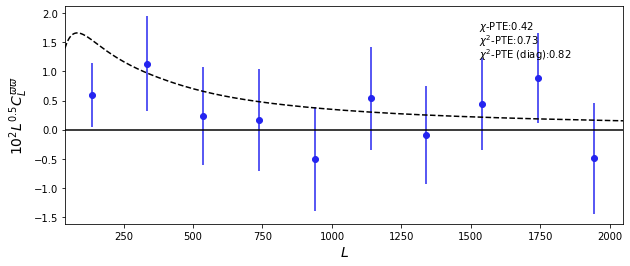

In [12]:
plot_spec(qobj['comb_n'],bnum=10,lmin=40)